## 0.1 Environment setup

In [3]:
# Import the required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## 0.2 Import Data

In [4]:
cars=pd.read_csv('D:\Learning\DataCamp\Python\Seaborn\mpg.csv')


## 0.3 Explore the data

In [5]:
cars.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
0,18.0,8,307.0,130.0,3504,12.0,70,usa,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,usa,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,usa,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,usa,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,usa,ford torino


In [6]:
cars.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    392 non-null    float64
 4   weight        398 non-null    int64  
 5   acceleration  398 non-null    float64
 6   model_year    398 non-null    int64  
 7   origin        398 non-null    object 
 8   name          398 non-null    object 
dtypes: float64(4), int64(3), object(2)
memory usage: 28.1+ KB


In [7]:
cars.shape

(398, 9)

In [8]:
cars.describe()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year
count,398.000000,398.000000,398.000000,392.000000,398.000000,398.000000,398.000000
mean,23.514573,5.454774,193.425879,104.469388,2970.424623,15.568090,76.010050
std,7.815984,1.701004,104.269838,38.491160,846.841774,2.757689,3.697627
min,9.000000,3.000000,68.000000,46.000000,1613.000000,8.000000,70.000000
25%,17.500000,4.000000,104.250000,75.000000,2223.750000,13.825000,73.000000
50%,23.000000,4.000000,148.500000,93.500000,2803.500000,15.500000,76.000000
75%,29.000000,8.000000,262.000000,126.000000,3608.000000,17.175000,79.000000
max,46.600000,8.000000,455.000000,230.000000,5140.000000,24.800000,82.000000


## 0.4 General data cleaning

In [10]:
##check for null values
cars.isnull().sum()

mpg             0
cylinders       0
displacement    0
horsepower      6
weight          0
acceleration    0
model_year      0
origin          0
name            0
dtype: int64

In [12]:
# check for duplicates
cars.duplicated().sum()

0

<AxesSubplot:xlabel='mpg'>

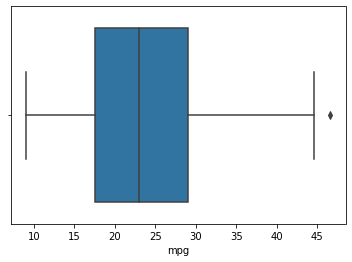

In [16]:
#detect the outliers
sns.boxplot(x=cars['mpg'])

<AxesSubplot:>

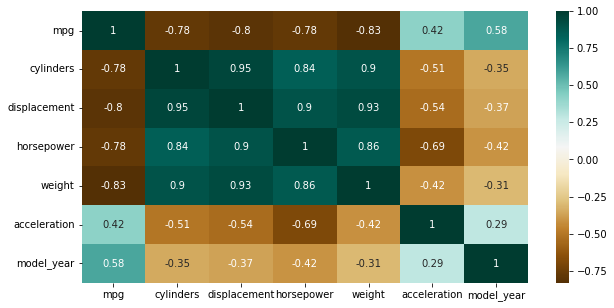

In [19]:
# plot the heat map
plt.figure(figsize=(10,5))
c= cars.corr()
sns.heatmap(c,cmap='BrBG',annot=True)

# Analysis

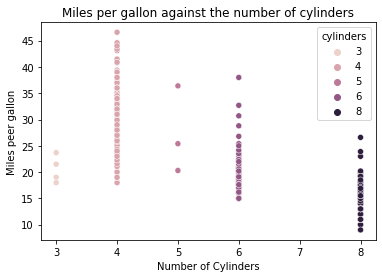

In [23]:
## relationship between the mpg and number of cylinders --use a scatter plot
sns.scatterplot(x='cylinders', y='mpg', data=cars, hue='cylinders')
plt.xlabel('Number of Cylinders')
plt.ylabel('Miles peer gallon')
plt.title("Miles per gallon against the number of cylinders")
plt.show()

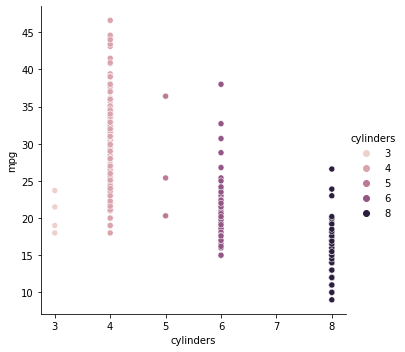

In [31]:
sns.relplot(x='cylinders', y='mpg', data=cars, hue='cylinders', kind='scatter')
plt.show()

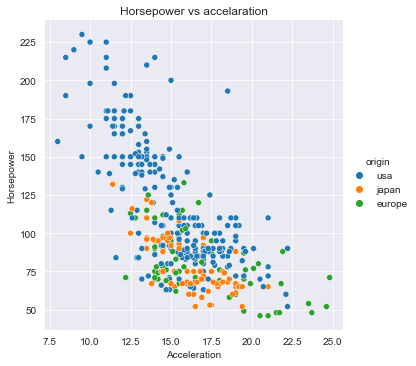

In [90]:
#relation between the horsepower and acceleration
sns.relplot(x='acceleration', y='horsepower', data=cars, hue='origin')
plt.xlabel('Acceleration')
plt.ylabel('Horsepower')
plt.title('Horsepower vs accelaration')
plt.show()

In [38]:
## group the cars by origin
comparison=cars.groupby('origin')[['acceleration','horsepower', 'mpg']].mean()

,acceleration,horsepower,mpg
origin,,,
europe,16.787143,80.558824,27.891429
japan,16.172152,79.835443,30.450633
usa,15.033735,119.048980,20.083534


In [62]:
cars['avg_hp']=cars['horsepower'].mean()
cars.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name,avg_hp
0,18.0,8,307.0,130.0,3504,12.0,70,usa,chevrolet chevelle malibu,104.469388
1,15.0,8,350.0,165.0,3693,11.5,70,usa,buick skylark 320,104.469388
2,18.0,8,318.0,150.0,3436,11.0,70,usa,plymouth satellite,104.469388
3,16.0,8,304.0,150.0,3433,12.0,70,usa,amc rebel sst,104.469388
4,17.0,8,302.0,140.0,3449,10.5,70,usa,ford torino,104.469388


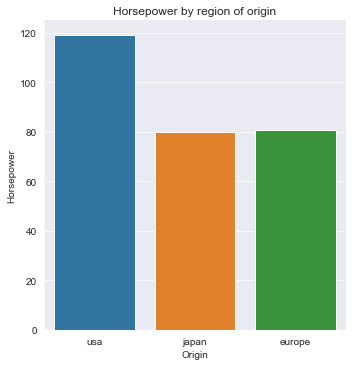

In [48]:
# how horsepower compares from cars manufactured btwn diffrent regions
sns.set_style("darkgrid")
sns.catplot(x='origin', 
            y='horsepower', 
            data=cars, 
            kind='bar',
           ci=None)
plt.xlabel('Origin')
plt.ylabel('Horsepower')
plt.title('Horsepower by region of origin')
plt.show()

In [64]:
# group the horse by year
g=cars.groupby('model_year')[['horsepower','acceleration']].mean()
print(g)

            horsepower  acceleration
model_year                          
70          147.827586     12.948276
71          107.037037     15.142857
72          120.178571     15.125000
73          130.475000     14.312500
74           94.230769     16.203704
75          101.066667     16.050000
76          101.117647     15.941176
77          105.071429     15.435714
78           99.694444     15.805556
79          101.206897     15.813793
80           77.481481     16.934483
81           81.035714     16.306897
82           81.466667     16.638710


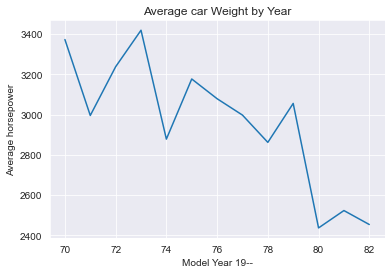

In [74]:
cars.groupby('model_year')['weight'].mean().plot(kind='line')
plt.xlabel('Model Year 19--')
plt.ylabel('Average Weight')
plt.title('Average car Weight by Year')
plt.show()

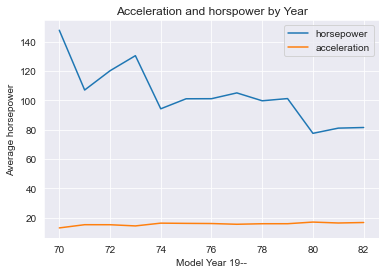

In [75]:
# get the weight trend by year
cars.groupby('model_year')[['horsepower','acceleration']].mean().plot(kind='line')
plt.xlabel('Model Year 19--')
plt.ylabel('Average horsepower')
plt.title('Acceleration and horspower by Year')
plt.show()

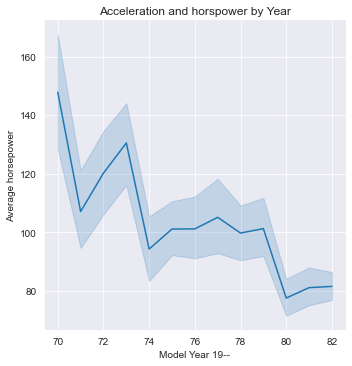

In [92]:
sns.relplot(x='model_year', y='horsepower', data=cars, kind='line')
plt.xlabel('Model Year 19--')
plt.ylabel('Average horsepower')
plt.title('Acceleration and horspower by Year')
plt.show()

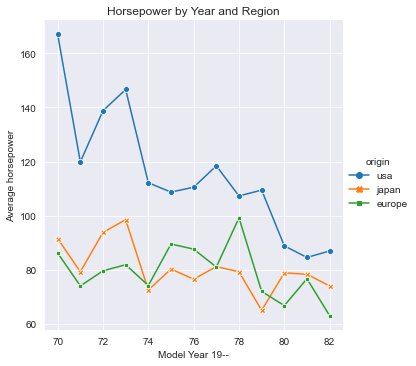

In [96]:
# horsepower changes by year per region 
sns.relplot(x="model_year", y="horsepower", 
            data=cars, kind="line", 
            ci=None, style="origin", 
            hue="origin", markers=True,
            dashes=False)
plt.xlabel('Model Year 19--')
plt.ylabel('Average horsepower')
plt.title('Horsepower by Year and Region')
plt.show()

In [80]:
# Cars with the highest miles per gallon -- consumption
specs=cars[['name', 'horsepower', 'mpg', 'acceleration']]
mpg_sorted=specs.sort_values('mpg', ascending=False)
print(mpg_sorted.head(15))

                                  name  horsepower   mpg  acceleration
322                          mazda glc        65.0  46.6          17.9
329                honda civic 1500 gl        67.0  44.6          13.8
325               vw rabbit c (diesel)        48.0  44.3          21.7
394                          vw pickup        52.0  44.0          24.6
326                 vw dasher (diesel)        48.0  43.4          23.7
244    volkswagen rabbit custom diesel        48.0  43.1          21.5
309                          vw rabbit        76.0  41.5          14.7
330               renault lecar deluxe         NaN  40.9          17.3
324                         datsun 210        65.0  40.8          19.2
247                     datsun b210 gx        70.0  39.4          18.6
343                     toyota starlet        58.0  39.1          16.9
344                     plymouth champ        64.0  39.0          16.4
310              toyota corolla tercel        60.0  38.1          18.8
387  o

In [97]:
#Sort the cars by their location on the basis of their fuel consumption
mpg_by_region=cars.groupby('origin')['mpg'].mean()
print(mpg_by_region.sort_values(ascending=False))

origin
japan     30.450633
europe    27.891429
usa       20.083534
Name: mpg, dtype: float64


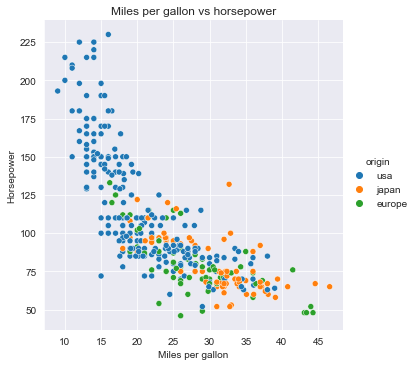

In [88]:
#relation between the horsepower and mpg
sns.relplot(x='mpg', y='horsepower', data=cars, hue='origin')
plt.xlabel('Miles per gallon')
plt.ylabel('Horsepower')
plt.title('Miles per gallon vs horsepower')
plt.show()